In [1]:
library("limma")
library("edgeR")

In [2]:
source("/ufrc/soltis/shan158538/TragFL_NewAnalysis/SLURM/rnaseq_plot_funcs.R")

In [3]:
setwd('/ufrc/soltis/shan158538/TragFL_NewAnalysis/OutPut/DE_analysis/Additive_expression_Tml')

In [4]:
targets <- readTargets()

In [5]:
print(targets)

                                files group description
1     both_counts_Tdu_1_2_Tdu_Tpr.csv   Tdu       Tdu_1
2     both_counts_Tdu_2_2_Tdu_Tpr.csv   Tdu       Tdu_2
3     both_counts_Tdu_3_2_Tdu_Tpr.csv   Tdu       Tdu_3
4     both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1
5     both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2
6     both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3
7 both_counts_new_Tml_1_2_tdu_tpr.csv   Tml       Tml_1
8 both_counts_new_Tml_2_2_tdu_tpr.csv   Tml       Tml_2
9 both_counts_new_Tml_3_2_tdu_tpr.csv   Tml       Tml_3


In [7]:
d <- readDGE(targets, sep=",")

In [8]:
print(dim(d))

[1] 11864     9


In [9]:
colnames(d) <- c("Tdu1","Tdu2","Tdu3","Tpr1","Tpr2","Tpr3","Tml1","Tml2","Tml3")

In [10]:
printHead(d)

$samples
                                   files group description lib.size
Tdu1     both_counts_Tdu_1_2_Tdu_Tpr.csv   Tdu       Tdu_1   976225
Tdu2     both_counts_Tdu_2_2_Tdu_Tpr.csv   Tdu       Tdu_2  1243376
Tdu3     both_counts_Tdu_3_2_Tdu_Tpr.csv   Tdu       Tdu_3  1365966
Tpr1     both_counts_Tpr_1_2_Tdu_Tpr.csv   Tpr       Tpr_1   800814
Tpr2     both_counts_Tpr_2_2_Tdu_Tpr.csv   Tpr       Tpr_2  1454907
Tpr3     both_counts_Tpr_3_2_Tdu_Tpr.csv   Tpr       Tpr_3   708250
Tml1 both_counts_new_Tml_1_2_tdu_tpr.csv   Tml       Tml_1   475528
Tml2 both_counts_new_Tml_2_2_tdu_tpr.csv   Tml       Tml_2   493618
Tml3 both_counts_new_Tml_3_2_tdu_tpr.csv   Tml       Tml_3   519307
     norm.factors
Tdu1            1
Tdu2            1
Tdu3            1
Tpr1            1
Tpr2            1
Tpr3            1
Tml1            1
Tml2            1
Tml3            1

$counts
                                                      Samples
Tags                                                   Tdu1 

In [11]:
all_samples = as.matrix(d$counts)
colnames(all_samples) <- d$samples$description
write.csv(all_samples, "all_samples.csv")

In [12]:
keep <- rowSums(cpm(d) > cpm(10,mean(d$samples$lib.size))[1]) >= 3
d <- d[keep,, keep.lib.sizes=FALSE]

# ">= 3" means have to meet the condidtion in as least 3 samples. This is because there are 3 replciates per species
# keep.lib.sizes=FALSE causes the library sizes to be recomputed after the filtering

In [13]:
print(dim(d))

[1] 8376    9


# After removing low counts orthologs, there are 8,376 loci left

In [14]:
pdf("additive_boxplot_log-CPM.pdf")

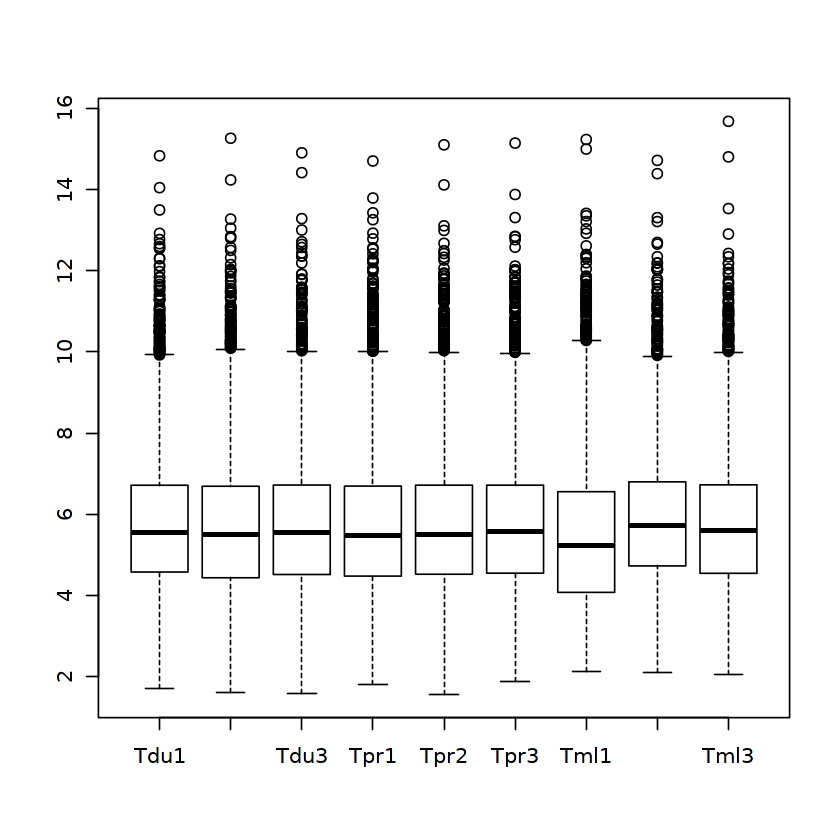

In [15]:
boxplot(cpm(d$counts + 1, log=TRUE))

In [16]:
dev.off()

pdf 
  3

In [17]:
trt = factor(c(1,1,1,2,2,2,3,3,3), labels=c("Tdu","Tpr","Tml"))
design=model.matrix(~0 + trt)

In [18]:
pdf("additive_voom_plot.pdf")

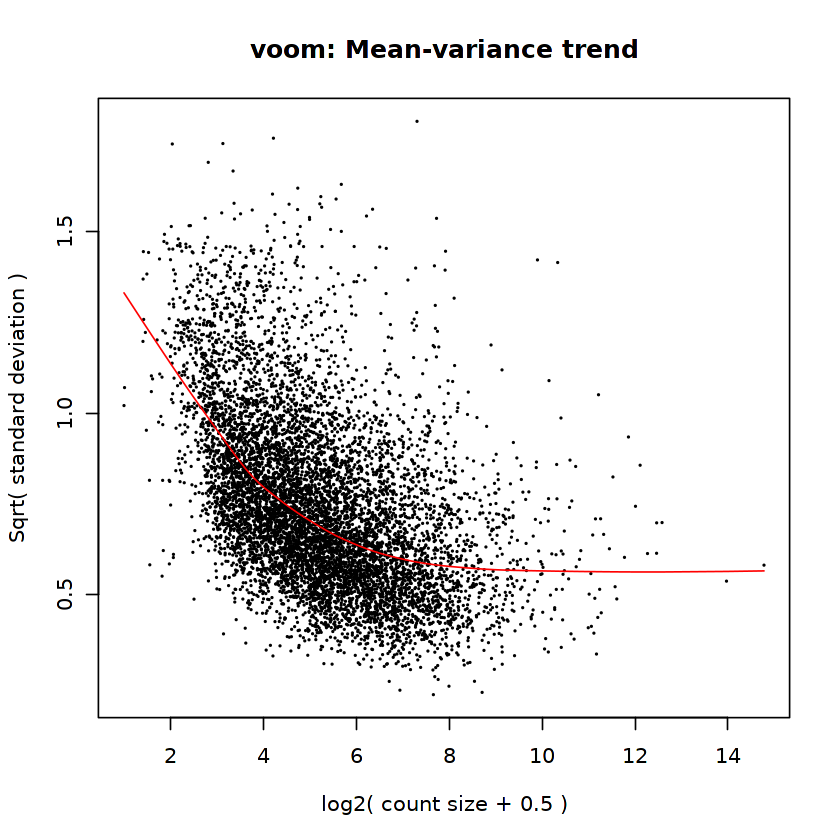

In [19]:
voom=voom(d, design, plot=TRUE)

In [20]:
dev.off()

pdf 
  3

In [21]:
write.table(voom$E, "additive_voom_expression_values.txt", sep="\t", quote=F, row.names = TRUE)
fit = lmFit(voom, design)
overall_model <- eBayes(fit)

In [22]:
pdf("additive_residual_std_dev.pdf")

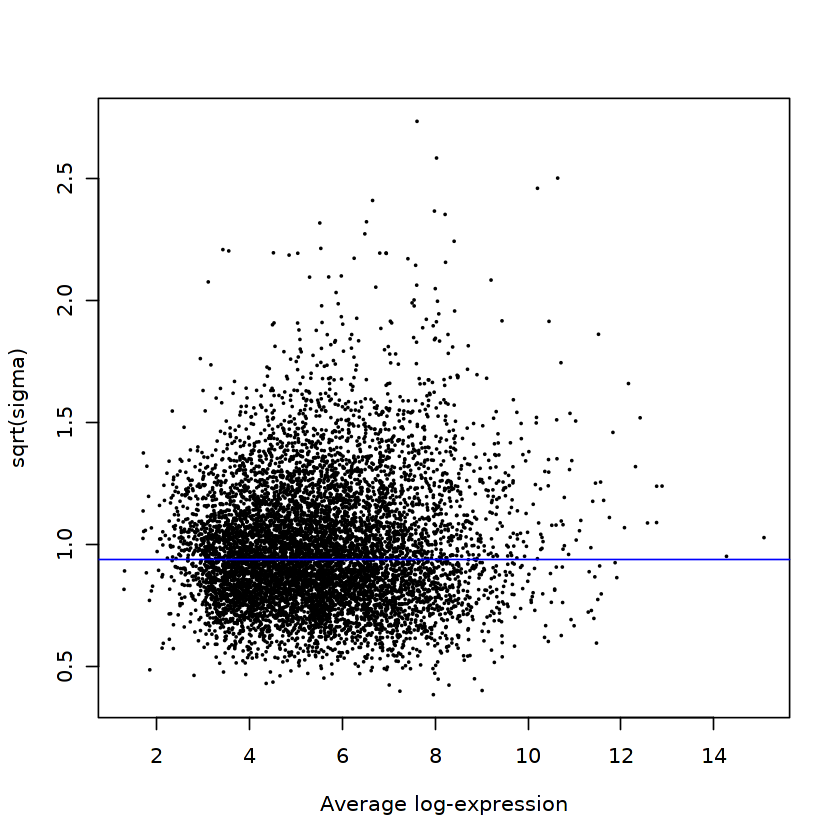

In [23]:
plotSA(overall_model)

In [24]:
dev.off()

pdf 
  3

In [25]:
topTable(overall_model, coef=ncol(design))
top=topTable(overall_model, sort="none", n=Inf, coef=ncol(design))
write.table(top, "additive_DE_overall_model.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN13584_c4_g1|Tdu_TRINITY_DN21118_c5_g1,10.85594,11.47236,91.92672,1.534169e-16,2.733031e-13,25.64429
Tpr_TRINITY_DN11525_c2_g3|Tdu_TRINITY_DN17060_c5_g3,11.18860,10.99051,90.50869,1.804459e-16,2.733031e-13,25.58309
Tpr_TRINITY_DN15098_c1_g6|Tdu_TRINITY_DN22619_c1_g1,14.75585,14.27302,89.42118,2.047131e-16,2.733031e-13,25.54822
Tpr_TRINITY_DN11928_c4_g3|Tdu_TRINITY_DN20996_c3_g2,11.18697,11.41675,88.35026,2.321459e-16,2.733031e-13,25.46192
Tpr_TRINITY_DN13339_c0_g1|Tdu_TRINITY_DN21172_c9_g1,12.00410,11.57523,86.76140,2.805565e-16,2.733031e-13,25.39573
Tpr_TRINITY_DN13270_c4_g1|Tdu_TRINITY_DN23742_c4_g1,10.46540,10.71391,86.57161,2.870427e-16,2.733031e-13,25.32392
Tpr_TRINITY_DN11540_c1_g1|Tdu_TRINITY_DN14814_c0_g1,10.36201,10.35346,86.04755,3.058219e-16,2.733031e-13,25.28625
Tpr_TRINITY_DN12100_c1_g5|Tdu_TRINITY_DN21143_c2_g4,10.81203,10.92405,85.45767,3.285850e-16,2.733031e-13,25.27368
Tpr_TRINITY_DN12153_c0_g2|Tdu_TRINITY_DN17816_c3_g7,11.49095,11.50036,84.73928,3.588485e-16,2.733031e-13,25.25582


In [26]:
print(summary(top))

     logFC            AveExpr             t               P.Value         
 Min.   : 0.0283   Min.   : 1.295   Min.   : 0.04116   Min.   :0.0000000  
 1st Qu.: 4.2557   1st Qu.: 4.248   1st Qu.: 9.23832   1st Qu.:0.0000000  
 Median : 5.3585   Median : 5.354   Median :16.41276   Median :0.0000000  
 Mean   : 5.4805   Mean   : 5.513   Mean   :20.14162   Mean   :0.0030327  
 3rd Qu.: 6.5750   3rd Qu.: 6.584   3rd Qu.:27.35604   3rd Qu.:0.0000024  
 Max.   :15.2351   Max.   :15.081   Max.   :91.92672   Max.   :0.9679456  
   adj.P.Val               B         
 Min.   :0.0000000   Min.   :-6.104  
 1st Qu.:0.0000000   1st Qu.: 5.312  
 Median :0.0000000   Median :10.826  
 Mean   :0.0030633   Mean   :10.441  
 3rd Qu.:0.0000032   3rd Qu.:15.821  
 Max.   :0.9679456   Max.   :25.644  


# Comparing Tdu and Tpr, results are relative to Tdu¶

In [27]:
contrast.matrix = makeContrasts(contrasts=c("trtTpr-trtTdu"), levels=design)
fit2 = contrasts.fit(fit, contrast.matrix)
fit2 = eBayes(fit2)

In [28]:
topTable(fit2, coef=ncol(contrast.matrix))
top=topTable(fit2, sort="none", n=Inf, coef=ncol(contrast.matrix))
write.table(top, "DE_Tdu_Tpr.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN11894_c0_g1|Tdu_TRINITY_DN15151_c0_g1,-3.126070,6.699491,-13.05922,8.341400e-08,0.0004538737,8.479528
Tpr_TRINITY_DN10835_c3_g2|Tdu_TRINITY_DN19567_c0_g4,2.583671,7.087423,12.69476,1.103295e-07,0.0004538737,8.317945
Tpr_TRINITY_DN12124_c1_g1|Tdu_TRINITY_DN20551_c2_g1,3.458685,6.814620,11.81284,2.238051e-07,0.0004538737,7.624614
Tpr_TRINITY_DN12160_c1_g3|Tdu_TRINITY_DN16869_c3_g1,2.163245,7.777539,11.55176,2.783957e-07,0.0004538737,7.447535
Tpr_TRINITY_DN10604_c3_g3|Tdu_TRINITY_DN18047_c0_g1,-2.592720,6.712735,-11.19033,3.793119e-07,0.0004538737,7.120812
Tpr_TRINITY_DN10582_c3_g4|Tdu_TRINITY_DN19797_c3_g1,3.417881,5.537689,11.25819,3.576791e-07,0.0004538737,7.019875
Tpr_TRINITY_DN11710_c2_g9|Tdu_TRINITY_DN24151_c1_g2,-2.801056,5.839827,-10.57100,6.577856e-07,0.0005616926,6.502244
Tpr_TRINITY_DN10778_c2_g1|Tdu_TRINITY_DN24374_c2_g1,2.608463,6.249577,10.44580,7.376575e-07,0.0005616926,6.477450
Tpr_TRINITY_DN12686_c2_g3|Tdu_TRINITY_DN20268_c7_g1,2.907148,5.944225,10.45087,7.342270e-07,0.0005616926,6.438507


# Comparing (Tdu+Tpr)/2 and Tml, results are relative to Tml

In [30]:
contrast.matrix=makeContrasts(contrasts=c("(trtTdu+trtTpr)/2-trtTml"), levels=design)
fit2=contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [31]:
topTable(fit2, coef=ncol(contrast.matrix))
top=topTable(fit2, sort="none", n=Inf, coef=ncol(contrast.matrix))
write.table(top, "DE_additive_Tdu_Tpr-Tml.txt", sep="\t", quote=F, row.names = TRUE)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tpr_TRINITY_DN15984_c4_g3|Tdu_TRINITY_DN22258_c5_g4,4.145379,8.778665,13.410133,6.414054e-08,0.0005372411,8.220883
Tpr_TRINITY_DN12489_c0_g1|Tdu_TRINITY_DN22258_c5_g2,3.102747,7.565344,12.492031,1.292999e-07,0.0005415081,7.446386
Tpr_TRINITY_DN10855_c3_g7|Tdu_TRINITY_DN23834_c1_g2,2.531862,7.864097,10.782992,5.431702e-07,0.0015165312,6.529533
Tpr_TRINITY_DN11118_c3_g2|Tdu_TRINITY_DN22303_c4_g1,2.271921,8.876137,9.974234,1.147917e-06,0.0019229910,6.003176
Tpr_TRINITY_DN11938_c4_g1|Tdu_TRINITY_DN23777_c2_g1,2.458317,6.970476,10.373877,7.882656e-07,0.0016506282,5.967955
Tpr_TRINITY_DN11700_c2_g3|Tdu_TRINITY_DN18621_c0_g2,2.331139,8.982000,9.385585,2.043859e-06,0.0028532274,5.464997
Tpr_TRINITY_DN11974_c1_g2|Tdu_TRINITY_DN24006_c1_g1,-1.792723,6.626265,-8.938542,3.231043e-06,0.0038661738,5.019936
Tpr_TRINITY_DN13839_c4_g1|Tdu_TRINITY_DN24059_c2_g2,-1.652043,7.863845,-8.265410,6.669507e-06,0.0069829734,4.332310
Tpr_TRINITY_DN10734_c0_g1|Tdu_TRINITY_DN23311_c1_g1,2.423702,8.004630,7.325267,1.984669e-05,0.0166235902,3.273747


In [32]:
pdf("additive_MDS_plot.pdf")

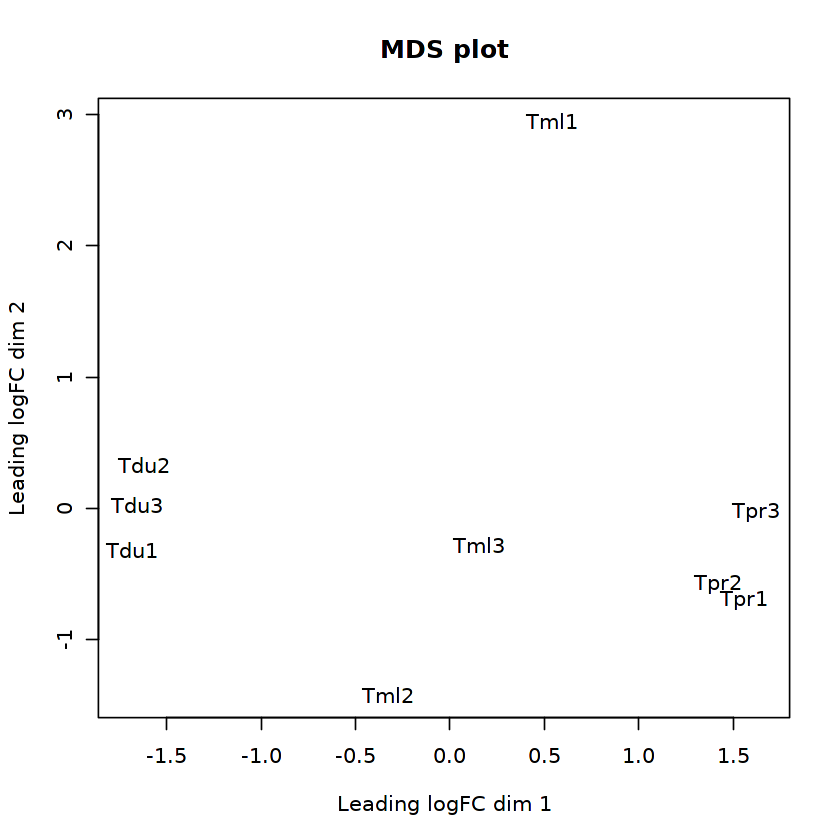

In [33]:
plotMDS(voom, main="MDS plot")

In [34]:
dev.off()

pdf 
  3